In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
key_information_infosys = ""
key_information_makemytrip = ""

text_file = open("//content/drive/MyDrive/NLP/key_information_preprocessed_infosys.txt", 'r')
key_information_infosys = text_file.read()

text_file = open("//content/drive/MyDrive/NLP/key_information_preprocessed_makemytrip.txt", 'r')
key_information_makemytrip = text_file.read()


In [ ]:
key_information_infosys

'item key information risk factor investing ad involves high degree risk carefully consider risk uncertainty described together information annual report form f including section titled management discussion analysis financial condition result operation consolidated financial statement related note making decision invest ad risk actually occur business financial condition result operation prospect could adversely affected event market price equity share ad could decline could lose part investment business result operation financial performance prospect could also harmed risk uncertainty currently known u currently believe material revenue difficult predict vary significantly periodtoperiod could cause share price decline therefore periodtoperiod comparison result operation relied upon indication future performance possible future result operation may expectation market analyst investor guidance could cause price equity share ad decline outlined risk could cause revenue profitability fl

In [ ]:
key_information_makemytrip

'forwardlooking statement contained principally section entitled item key information item information company item operating financial review prospect statement relate event involve known unknown risk uncertainty factor including listed item key information risk factor may cause actual result performance achievement materially different future result performance achievement expressed implied forwardlooking statement case forwardlooking statement identified word phrase may expect anticipate aim estimate intend plan believe potential continue isare likely similar expression forwardlooking statement subject risk uncertainty assumption beyond control addition forwardlooking statement reflect current view respect future event guarantee future performance actual outcome may differ materially information contained forwardlooking statement result number factor including without limitation risk factor set forth item key information risk factor following ability maintain expand supplier relatio

# Tokenizing into words

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
# Your preprocessed text
text = key_information_infosys

# Tokenize the text into words
words = word_tokenize(text)

# Print the tokens
print(len(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


12792


# Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000  # Limit the number of features (words)
)

# Fit and transform the text into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(words)

# Access feature names and TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the TF-IDF scores
print(tfidf_scores)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#top keywords
import numpy as np

# Calculate the mean TF-IDF score for each keyword or phrase
mean_tfidf_scores = np.mean(tfidf_scores, axis=0)
top_keywords = [feature_names[i] for i in np.argsort(mean_tfidf_scores)[::-1]]


In [ ]:
top_keywords[:20]

['may',
 'client',
 'could',
 'business',
 'service',
 'impact',
 'result',
 'risk',
 'tax',
 'operation',
 'adversely',
 'company',
 'share',
 'cost',
 'affect',
 'financial',
 'employee',
 'technology',
 'ability',
 'revenue']

# WordCloud

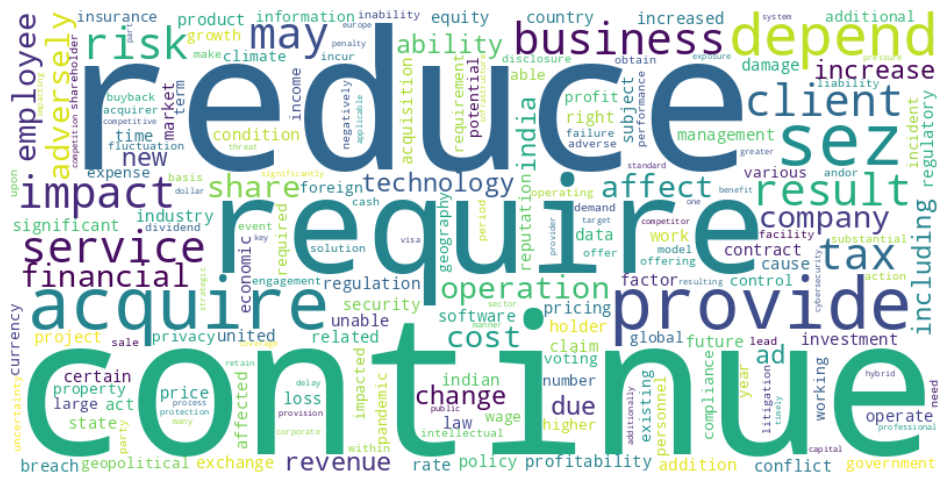

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the selected top keywords into a single string
top_keywords_text = " ".join(top_keywords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_keywords_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Keyword Co-occurence

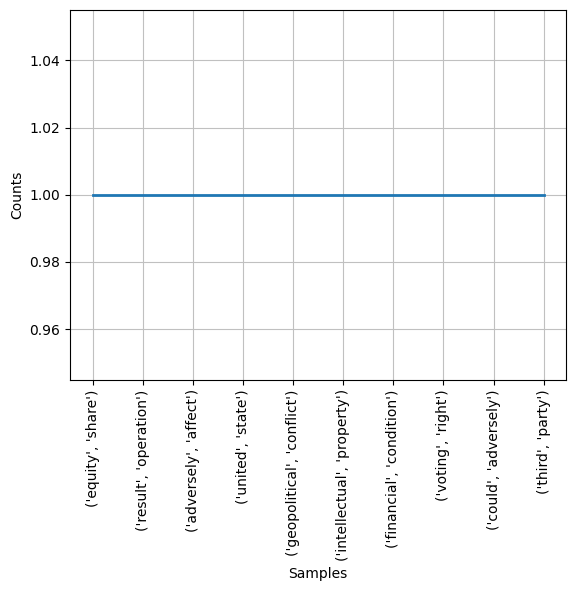

In [ ]:
import nltk
from nltk import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import matplotlib.pyplot as plt
# Create bigrams (pairs of co-occurring words)
finder = BigramCollocationFinder.from_words(words)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

# Create a frequency distribution of bigrams
bigram_freq = FreqDist(bigrams)

# Plot the most common co-occurring bigrams
bigram_freq.plot(20)
plt.show()


# Topic Modelling

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
# Your preprocessed text
text_infosys = key_information_infosys
# Tokenize the text into words
words_infosys = word_tokenize(text_infosys)

text_makemytrip = key_information_makemytrip
# Tokenize the text into words
words_makemytrip = word_tokenize(text_makemytrip)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#we have to represent risk_factor_texts as a list of documents, where each document is a list of words
risk_factors = [words_infosys, words_makemytrip]

Coherence Score: 0.30234990722202176


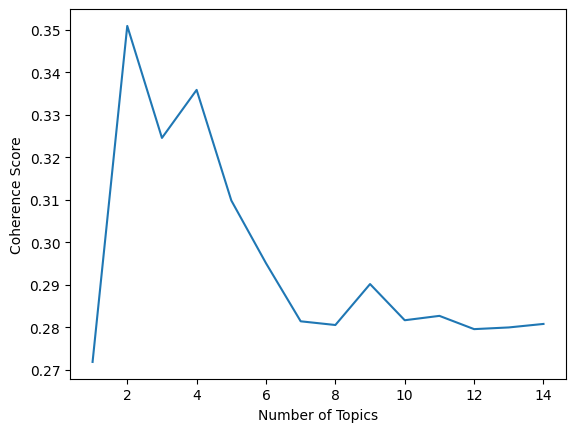

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Assuming 'processed_risk_factors' is a list of preprocessed risk factor texts

# Step 1: Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(risk_factors)
corpus = [dictionary.doc2bow(text) for text in risk_factors]

# Step 2: Train the LDA model
num_topics = 5  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Step 3: Evaluate the model and choose the optimal number of topics
coherence_model_lda = CoherenceModel(model=lda_model, texts= risk_factors, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_score}')

# Plot the coherence score for different numbers of topics
topics_range = range(1, 15)
coherence_scores = []
for num_topics in topics_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model_lda = CoherenceModel(model=lda_model, texts= risk_factors, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())

plt.plot(topics_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()


In [ ]:
# Once you've determined the optimal number of topics, you can extract the topics
dictionary = corpora.Dictionary(risk_factors)
corpus = [dictionary.doc2bow(text) for text in risk_factors]

optimal_num_topics = 4  # Adjust based on the coherence score plot
lda_model = LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15)

# Get the topics and their top words
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.001*"may" + 0.001*"year" + 0.001*"business" + 0.000*"u" + 0.000*"could" + 0.000*"service" + 0.000*"fiscal" + 0.000*"cost" + 0.000*"share" + 0.000*"client"')
(1, '0.001*"may" + 0.000*"service" + 0.000*"share" + 0.000*"business" + 0.000*"revenue" + 0.000*"fiscal" + 0.000*"million" + 0.000*"result" + 0.000*"cost" + 0.000*"year"')
(2, '0.016*"year" + 0.014*"fiscal" + 0.013*"million" + 0.012*"share" + 0.011*"business" + 0.010*"service" + 0.010*"may" + 0.010*"revenue" + 0.008*"india" + 0.008*"cost"')
(3, '0.029*"may" + 0.016*"client" + 0.011*"could" + 0.011*"business" + 0.010*"service" + 0.009*"impact" + 0.008*"u" + 0.008*"result" + 0.007*"risk" + 0.007*"tax"')


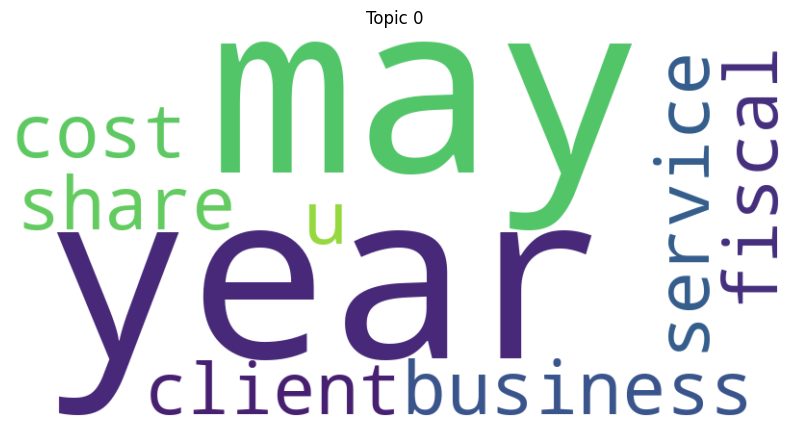

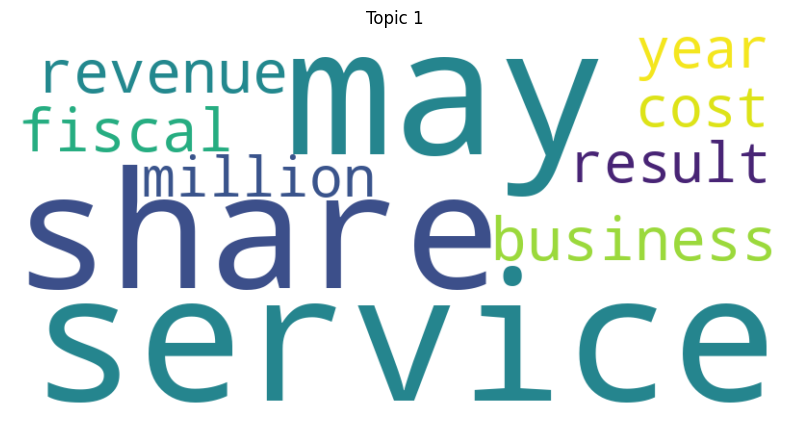

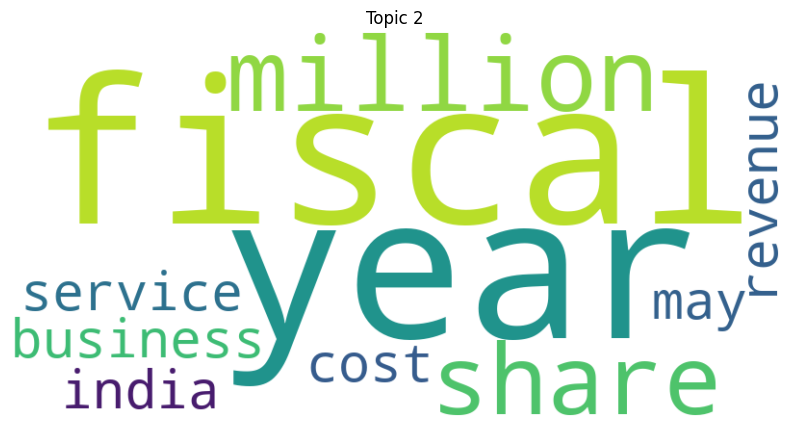

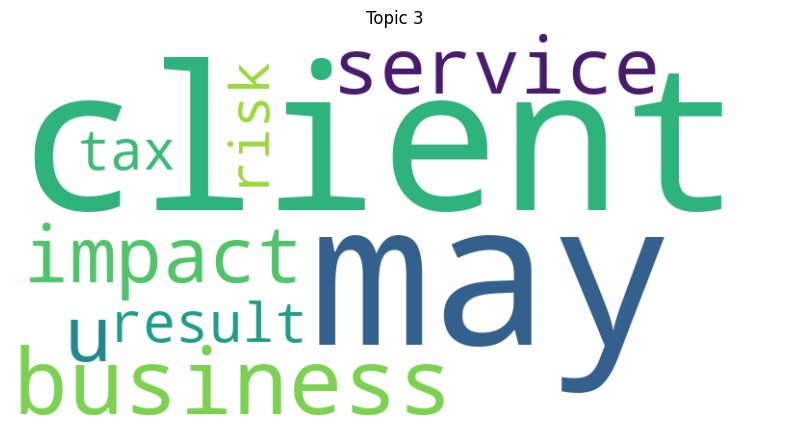

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic in lda_model.show_topics():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic[1])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Topic {}".format(topic[0]))
    plt.axis("off")
    plt.show()


#SUMMARIZATION ON KEY INFORMATION

In [ ]:
!pip install transformers
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.3 MB/s eta 0:00:00


In [ ]:
key_information_infosys

'item key information risk factor investing ad involves high degree risk carefully consider risk uncertainty described together information annual report form f including section titled management discussion analysis financial condition result operation consolidated financial statement related note making decision invest ad risk actually occur business financial condition result operation prospect could adversely affected event market price equity share ad could decline could lose part investment business result operation financial performance prospect could also harmed risk uncertainty currently known u currently believe material revenue difficult predict vary significantly periodtoperiod could cause share price decline therefore periodtoperiod comparison result operation relied upon indication future performance possible future result operation may expectation market analyst investor guidance could cause price equity share ad decline outlined risk could cause revenue profitability fl

In [ ]:
key_information_makemytrip

'forwardlooking statement contained principally section entitled item key information item information company item operating financial review prospect statement relate event involve known unknown risk uncertainty factor including listed item key information risk factor may cause actual result performance achievement materially different future result performance achievement expressed implied forwardlooking statement case forwardlooking statement identified word phrase may expect anticipate aim estimate intend plan believe potential continue isare likely similar expression forwardlooking statement subject risk uncertainty assumption beyond control addition forwardlooking statement reflect current view respect future event guarantee future performance actual outcome may differ materially information contained forwardlooking statement result number factor including without limitation risk factor set forth item key information risk factor following ability maintain expand supplier relatio

In [ ]:
'''from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize a text file
def summarize_text_file(file_path, max_chunk_length=1024):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Split the text into chunks to avoid exceeding the maximum sequence length
    text_chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    # Generate summaries for each chunk
    summaries = []
    for chunk in text_chunks:
        summary = summarizer(chunk, max_length=50, min_length=10, do_sample=False)
        summaries.append(summary[0]["summary_text"])

    # Combine the individual summaries
    combined_summary = " ".join(summaries)
    return combined_summary

file1_path = "//content/drive/MyDrive/NLP/key_information_preprocessed_infosys.txt"
file2_path = "//content/drive/MyDrive/NLP/key_information_preprocessed_makemytrip.txt"


# Summarize the content of the first file
summary1 = summarize_text_file(file1_path)

# Summarize the content of the second file
summary2 = summarize_text_file(file2_path)

# Print the summaries
print("Summary for key_information_infosys.txt:")
print(summary1)

print("\nSummary for key_information_makemytrip.txt:")
print(summary2)'''


Your max_length is set to 50, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 50, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Summary for key_information_infosys.txt:
Investing ad involves high degree risk carefully consider risk uncertainty described together information annual report form f including section titled management discussion analysis financial condition result operation consolidated financial statement related. Risk factors include economic geopolitical monetary fiscal policy regulatory environment market operate. Economic slowdown factor may affect economic health united state united kingdom european union eu australia industry revenue concentrated.  onomic condition may adversely impact ability recover fee service rendered. intense competition market technology service could affect win rate pricing could reduce market share decrease revenue profit. restriction visa cost increase obtaining visa increase required minimum wage level visa dependent employee inordinate delay Success depends largely upon highly skilled technology professional ability hire attract motivate retain train personnel v ri

## Result table

In [ ]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=960d0d82b48626bd5ff06fdea2fb865a18f69d792e82643673bb350af5d6278d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
pip install prettytable

In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import corpus_bleu
from prettytable import PrettyTable

# Reference summaries for file1 and file2 (replace with actual reference summaries)
reference_summary1 = "/content/drive/MyDrive/NLP/key_information_preprocessed_infosys.txt"
reference_summary2 = "/content/drive/MyDrive/NLP/key_information_preprocessed_makemytrip.txt"

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores1 = scorer.score(summary1, reference_summary1)
scores2 = scorer.score(summary2, reference_summary2)

# Calculate BLEU scores
bleu_score1 = corpus_bleu([[reference_summary1.split()]], [summary1.split()])
bleu_score2 = corpus_bleu([[reference_summary2.split()]], [summary2.split()])

# Create a table
table = PrettyTable()
table.field_names = ["Metric", "File 1 Score", "File 2 Score"]
table.add_row(["ROUGE-1 Precision", scores1["rouge1"].precision, scores2["rouge1"].precision])
table.add_row(["ROUGE-1 Recall", scores1["rouge1"].recall, scores2["rouge1"].recall])
table.add_row(["ROUGE-1 F1-Score", scores1["rouge1"].fmeasure, scores2["rouge1"].fmeasure])
table.add_row(["ROUGE-2 Precision", scores1["rouge2"].precision, scores2["rouge2"].precision])
table.add_row(["ROUGE-2 Recall", scores1["rouge2"].recall, scores2["rouge2"].recall])
table.add_row(["ROUGE-2 F1-Score", scores1["rouge2"].fmeasure, scores2["rouge2"].fmeasure])
table.add_row(["ROUGE-L Precision", scores1["rougeL"].precision, scores2["rougeL"].precision])
table.add_row(["ROUGE-L Recall", scores1["rougeL"].recall, scores2["rougeL"].recall])
table.add_row(["ROUGE-L F1-Score", scores1["rougeL"].fmeasure, scores2["rougeL"].fmeasure])
table.add_row(["BLEU Score", bleu_score1, bleu_score2])

# Print the table
print(table)

+-------------------+----------------------+------------------------+
|       Metric      |     File 1 Score     |      File 2 Score      |
+-------------------+----------------------+------------------------+
| ROUGE-1 Precision |  0.2222222222222222  |   0.5555555555555556   |
|   ROUGE-1 Recall  | 0.000545404963185165 | 0.0008631106507854307  |
|  ROUGE-1 F1-Score | 0.001088139281828074 |  0.001723543605653223  |
| ROUGE-2 Precision |         0.0          |         0.125          |
|   ROUGE-2 Recall  |         0.0          | 0.00017265193370165745 |
|  ROUGE-2 F1-Score |         0.0          | 0.0003448275862068965  |
| ROUGE-L Precision |  0.2222222222222222  |   0.3333333333333333   |
|   ROUGE-L Recall  | 0.000545404963185165 | 0.0005178663904712584  |
|  ROUGE-L F1-Score | 0.001088139281828074 | 0.0010341261633919337  |
|     BLEU Score    |          0           |           0            |
+-------------------+----------------------+------------------------+


##Summary for key information of infosys

Investing ad involves high degree risk carefully consider risk uncertainty described together information annual report form f including section titled management discussion analysis financial condition result operation consolidated financial statement related. Risk factors include economic geopolitical monetary fiscal policy regulatory environment market operate. Economic slowdown factor may affect economic health united state united kingdom european union eu australia industry revenue concentrated.  onomic condition may adversely impact ability recover fee service rendered. intense competition market technology service could affect win rate pricing could reduce market share decrease revenue profit. restriction visa cost increase obtaining visa increase required minimum wage level visa dependent employee inordinate delay Success depends largely upon highly skilled technology professional ability hire attract motivate retain train personnel v risk related contractual obligation failure. investing substantial cash creating physical technological infrastructure profitability could reduced business. K related operation transition hybrid working model may expose u various risk. reputation could risk may liable client regulator damage caused inadvertent disclosure confidential information sensitive data. reputation access capital longerterm financial stability could risk unable meet stated goal environmental social governance es Businesses may continue experience shortage supply worker could increase due enactment restrictive legislation regulation immigration certain geography would adversely affect business b new changing regulatory compliance corporate governance public disclosure requirement add uncertainty compliance policy increase cost compliance. Market fluctuates depending many factor including economic geopolitical monetary fiscal policy regulatory environment market operate technology budget client frequently impacted economic slowdown geopolitical conflict uncertainty market operate resulting reduction spending past adversely impacted. Client may subject stringent compliance requirement including industry specific compliance privacy security standard handling data. Financial service enterprise obtain regulatory approval prior outsourcing certain function regulator across world may regulate emerging technology setting boundary banning use evolving regulatory framework may impact revenue profitability.  conflict past may future lead increase consumer wage inflation energy price interest rate currency fluctuation thus impacting revenue profitability client example client shut operation russia due conflict eastern europe result client may become cautious reduce discretionary spending short term delay decisionmaking process respect Banking crisis additionally sudden resurgence covid pandemic geography significant exposure client exposure majority employee located may impact revenue profitability economic slowdown factor may affect economic health united state united kingdom european union eu australia industry revenue concentrated revenue concentrated Sing various factor including global pandemic geopolitical conflict impacting financial service industry retail consumer good energy manufacturing depend substantial portion annual revenue may result reduction postponement. Climate change could consequently impact business reputation. impact revenue profitability client may operate sector adversely impacted climate change. Work visa permit make business vulnerable change variation immigration law including policy change way law interpreted enforced potential enforcement action penalty might cause u lose access visa. y affect business result operation financial condition portion employee united state united kingdom eu country region rely work Businesses may expose u consequential sanction administrative action loss government contract engagement large part revenue dependent limited number client loss one major client could significantly impact business historically earned believe future continue. Client reduction business client certain case business may impacted large client either change outsourcing strategy moving work house replacing existing software packaged software supported licensor reduced technology spending response challenging geopolitical economic competitive environment may also result loss. Banking sector geopolitical conflict global challenge may adversely affect ability recover fee service rendered client client may impacted banking crisis financial exposure affected bank adverse change india debt rating credit rating international domestic rating agency could also negatively impact business profitability. Risk factor section may able provide endtoend business solution client could lead client discontinuing work u turn could harm business recent year expanding nature scope client engagement extending breadth solution service offer include example software application automation solution. Technology service provider vendor require thorough understanding client operation ability establish relationship depend number factor including proficiency technology professional management personnel thus unable attain thorough understanding. Service offering may effectively meet client need jeopardize. Technology service could affect win rate pricing could reduce market share decrease revenue profit revenue profit depend part upon continued demand service existing new client ability meet demand competitive costeffective manner. Technology service industry experiencing rapid change affecting competitive landscape. Competition significantly greater financial technical marketing resource generate greater revenue extensive existing client relationship technology partnership greater brand recognition greater ability hire key technology management talent may unable compete successfully.  t need lose client fail attract new client forced make pricing concession result inability differentiate service commoditization increased competition business financial condition result operation may adversely affected. ability maintain increase pricing restricted client often expect business receive efficiency gain volume discount lower rate may Business engagement client typically singular nature necessarily provide subsequent engagement client generally retain u shortterm engagementbyengagement basis connection specific project rather recurring basis longterm contract although substantial majority revenue generated repeat business define revenue client also contributed revenue prior fiscal year engagement Technology service market characterized rapid technological change evolving industry standard changing client preference. Future success depend ability anticipate advance develop new product service offering meet client need may fail anticipate respond advance timely basis. Developing service technology may involve significant upfront investment failure. Service technology may result inability recoup investment able identify timely retire. Developing new software product platform may recouped. Software product platform revenue typically occur period subsequent period cost incurred. Development software product platforms delayed revenue may cause periodic fluctuation. Future acquisition could issue equity security would dilute current shareholder percentage ownership incur substantial debt incur significant acquisitionrelated expense assume contingent liability expend significant cash financing activity expenditure could harm business result. Earlystage technology startup company gain experience exploit niche technology however investment may generate expected return demand supply cash flow company adversely affected due economic uncertainty geopolitical conflict lack profitability investment could adversely affect result.  may lead impairment charge future significant impairment charge could adversely affect result operation. risk related cost structure expense difficult predict vary significantly period period could cause fluctuation profitability significant part total operating expense particularly expense related personnel facility fixed advance. Economic downturn change immigration law policy enforcement key market would restrict offshore outsourcing restrict availability certain visa thereby limiting ability staff project timely manner generate revenue investment towards localization strategy. Immigration regulation would increase cost business onsite significantly would impact profitability. Large deal may require u acquire asset future pricing assumption decided upfront time signing deal addition may make various assumption related cost structure execution deal change assumption due external internal factor may impact profitability. Competition talent impacted continues impact wage cost wage increase may prevent u  y improvement contract client failure realize anticipated productivity improvement either due to inability identify area automate optimize process effectively address service delivery risk manage client requirement may impact profitability increase operating expense offset increase pricing acquisition.  nadequate financial control may increase possibility fraud andor negatively impact accuracy financial reporting shareholder relationship addition continued growth increase challenge involved recruiting training retaining sufficient skilled technical marketing management personnel adhering to high quality process execution standard. Company may face competition country company may experience operation country international operation generally may also face difficulty integrating new facility different country existing operation organizational structure process culture may sufficiently agile adaptive embrace change required execute strategy wage pressure hiring employee subcontractor either outside india Wage increase india may prevent u sustaining competitive advantage may negatively affect profit historically experienced significant competition employee large multinational company established continue establish offshore operation india well company within india increased demand talent india. Employers may need to increase employee compensation to attract retain employee skilled newer technology area remain competitive employer seek recruit low labor cost jurisdiction keep wage cost low certain year may issue incentive compensation plan including stockbased compensation plan employee management compensation increase future may  cale leading higher fulfilment cost including potential penalty client investing substantial cash creating physical technological infrastructure profitability could reduced business grow proportionately march contractual commitment million. The Indian rupee expects majority revenue continue generated foreign currency including u dollar euro australian dollar united kingdom pound sterling foreseeable future. A significant portion expense including personnel cost well capital operating expenditure continue denominated u dollar indian rupee accordingly Use derivative financial instrument foreign exchange forward option contract mitigate risk change foreign exchange exposure purchase derivative instrument however may adequate insulate foreign currency exchange risk may incur loss due unanticipated significant intra quarter movement currency market could adverse impact profit result operation. Employee success depends largely upon highly skilled technology professional ability hire attract motivate retain train personnel ability execute project especially large complex integrated program maintain client relationship acquire new client. rising macroeconomic issue geopolitical conflict may adversely impact profitability iv risk related employee workforce Technology company particularly india may affect ability hire retain adequate number skilled experienced technology professional. Technology industry need changing demography increase need hiring differently skilled diversified talent. New wave digital service requires talent differentiated skill. Success depends large part upon management team key personnel ability attract retain highly dependent member. e timely effectively train deploy client project utilization client satisfaction profitability could adversely affected addition unable increase employee compensation adequately reduce compensation variable pay employee may result increased attrition. Senior management personnel attract retain new senior management personnel. Future furthermore maintain key man life insurance senior member management team key personnel loss member senior management key personnel become unavailable. Risk of entering fixedprice fixedtimeframe arrangement transactionbased pricing arrangement fail properly estimate appropriate pricing project may earn lower profit incur loss result unable execute project timeframe amount labor expected. ient previously offered term order give flexibility pay use service risk  client typically retain u nonexclusive projectbyproject basis.  timeandmaterials basis would increase risk business client contract typically terminated without cause could negatively impact revenue profitability. client including financial difficulty client including limited access credit market.  client contract often conditional upon performance unsatisfactory could result lower revenue previously anticipated number client contract incentivebased pricing term condition fee ability meet defined performance goal service level addition certain client situation may require u agree higher contractual liability exposure limit failure meet goal client  client may seek favorable term u contract particularly connection clause related limitation liability damage resulting unsatisfactory performance service damage resulting failure particularly unable recover damage full insurer may adversely impact business revenue operating margin. geopolitical conflict turn affect ability meet contractual commitment leading client dissatisfaction Government contracting process includes following project may subject higher risk reduction scope termination contract due political economic factor change government pending election reduction absenc. thirdparty comparing pricing performance efficiency gain delivered contract service agreed upon list service provider comparable service. Government contract may include among thing higher liability exposure u direct indirect damage extensive right audit punitive service level penalty restrictive covenant additionally risk delayed payment change term contract. ibery act among thing prohibits giving offering give anything value intent influence awarding government contract. believe adequate policy enforcement mechanism ensure legal regulatory compliance fcpa.  hybrid working model may experience following risk ability ass candidate effectively. Virtual hiring process may affected due potential fake profile candidate employing fraudulent mechanism. Service delivery disruption impacting business operation increased potential fraud. Lack of physical training session may impact ability to train employee hybrid working model. Employee working multiple employer simultaneously moonlighting without obtaining required prior approval may result potential conflict interest confidentiality breach reduced productivity. Human technological error could lead potential unauthorized disclosure sensitive data turn could jeopardize project critical operation client business theft andor unauthorized use publication. Incident could adversely affect reputation competitive position. T potential liability breach confidentiality global service provider client broad range industry often access required manage utilize collect store sensitive data subject various regulatory regime including limited u federal state law governing protection personal financial health data gdpr law superseded eu directive data  cyber insurance includes cyber insurance might sufficient type amount cover u claim related security breach cyberattacks related breach many contract involve project critical operation client business provide benefit may difficult quantify failure client system breach security regardless responsibility failure could result claim substantial damage u force  cybersecurity incident increase sophistication complexity cyberattacks cybercrime cyber insecurity made global cyber threat landscape highly volatile organization across world need vigilant order shield cybersecurity risk associated peril. Thirdparty service provider may target cybersecurity attack especially workforce operates hybrid model due global geopolitical conflict Cybersecurity breach information security incident due multitude factor including following insider threat hacker state nonstate actor intent cause harm u client including example government client client sensitive industry segment financial service energy utility healthcare human error inadvertent action employee contractor malware ransomware virus  cybersecurity breach data security incident could adverse impact current future business operation financial performance reputation. Industry involving sensitive data financial service energy utility healthcare industry addition increased dependence cloud vendor consequential largescale failure.  cybersecurity insurance cover first party loss occur due cybersecurityincident wherein loss include cost forensics appointing crisis consultant. atory investigation inquiry damage fine penalty liability substantial harm reputation loss business significant cost investigate remediate otherwise address breach incident could also incur increased  privacy regulation across globe attributed u able take necessary step report breach incident regulator data subject wherever applicable within stipulated time claim client loss suffered due privacy breach caused employee may impact u financially affect reputation gdpr similar data privacy law jurisdiction impose additional Data privacy breach breach could adversely impact financial result reputation recently aibased tool technology proliferated across digital industry. Early stage industry regulator may able anticipate adequately manage privacy threat. Litigation matter could adversely affect business result operation reputation financial position cash flow prolonged economic downturn geopolitical conflict resulting financial impact client vendor stakeholder along situation like cybersecurity threat. Data breach contractual suspension delayed payment similar incident may give rise litigation dispute stake  insurance policy cover potential loss may subject however coverage may continue available reasonable term may unavailable sufficient amount cover one large claim also insurer might disclaim coverage future claim. d personally identifiable confidential information system failure error unsatisfactory performance service client event thirdparty claim Disaster could adversely affect financial condition result operation assurance claim filed insurance policy honored fully timely financial condition may adversely affected extent suffer loss damage covered insurance exceeds insurance coverage market operate subject risk earthquake flood tsunami storm pandemic disaster region operate prone earthquake flood Business continuity employee productivity safety employee asset infrastructure may affected untoward incident beyond control impacting business continuity reputation health safety employee working behalf present office security physical infrastructure may affect due act violence vandalism antisocial element emergence disease pandemic geopolitical conflict although take Terrorism military coup threat warfare part world eastern europe could cause geopolitical instability turn may impact client impact ability execute project attack may destabilize economic political situation india country large operation.  conflict south asia could adversely affect indian economy. could negative impact business personnel asset result operation. could cause client potential client choose vendor service provide regional conflict. Business climate change risk increasingly manifesting business strategic risk physical risk transitional market compliance risk managed adequately affect operation reputation profitability. Extreme weather event could directly impact operation employee livelihood impact ability business ensure business continuity large operating campus major urban city operating risk include disruption power water supply campus. climate related market risk response increasing awareness climate change related socio environmental issue client increasingly request climate Climate related regulatory risk scientific community global leader agreed upon importance limiting global temperature increase well c minimize devastating impact climate change. ment commitment science based target supply chain emission reduction program response inquiry may become important factor. Brand reputation may lead consequence risk resulting potential violation nonconformance climate law regulation could impact profitability incurrence penalty limiting ability operate certain geography could adversely impact business performance reputation brand reputation access capital longerterm financial stability may adversely impacted. Board senior management regardless factual basis assertion made may adversely impact reputation addition responding allegation made medium significantly divert time attention board senior management away business disrupt operation. unfavorable publicity may also adversely impact investor confidence directly indirectly cause price equity share ad decline. Ance experienced may continue experience shortage supply worker could increase due enactment restrictive legislation regulation immigration certain geography would adversely affect business experienced significant shortage talent level reason shortage manifold continuing studied attendant risk. Law regulation standard relating accounting corporate governance public disclosure create uncertainty compliance effort may result added compliance cost. India witnessed sweeping change corporate law regime past year. Corporate compliance regime also increasingly subject social regulation modern slavery legislation around world including uk australia uk. Law india may give sufficient protection software related intellectual property right extent united state. Law india take utmost care protecting intellectual property competitor may independently develop similar technology duplicate product service unautho. Ai system may infringe upon misappropriate product service proprietary information. Intellectual property could disrupt ongoing business distract management employee reduce revenue increase expense. U may assert patent right technology utilize business become liable third party infringing intellectual property right could required pay substantial damage award forced develop noninfringing technology obtain license cease selling application product. Employee may reuse intellectual property. Third party claim claim could harm reputation cause u incur substantial cost prevent u offering service solution. Future related proceeding could require u expend significant resource extended period time contract agree indemnify client expense liability. Software industry making increased use opensource software development work also incorporate opensource technology service proprietary product platform may expose u liability material impact product development sale. Software may adversely expose product result financial claim.  bility thirdparty claim may require u disclose source code public make freely accessible opensource term may result potential financial impact claim due unknown vulnerability requirement. product could adversely affect competitive position result business operation financial condition relationship client net income would decrease government Union budget proposed reduce rate corporate tax next four year phased manner starting fiscal process reducing corporate tax rate would likely accompanied rationalization removal various kind tax exemption incentive corporate taxpayer accordingly taxation law amendment act introduced sectio sectio.  domestic company exercise option reduced rate corporate tax plus surcharge ce without claim certain deduction mentioned therein including deduction sez unit section aa income tax act finance act tax incentive shall available. Tax holiday expire reduce terminate tax expense materially increase reducing profitability Tax law lack commercial substance deemed lacking commercial substance carried manner normally employed bona fide purpose transaction found impermissible avoidance arrangement. ds base erosion profit shifting project india active participant applicable fiscal pursuant gaar arrangement main purpose one main purpose obtain tax Indian finance act effective april excluded goodwill definition block asset result income tax depreciation shall allowed deduction computing total income depreciation claimed march. Company may gross withholding tax case relevant tax document availing benefit double taxation avoidance agreement furnished. Pillar beps including tax digital service may impact tax cost operate jurisdiction impose transfer pricing taxrelated regulation u failure comply could adversely affect profitability required comply various tr. ry tax gst increased indirect tax compliance group concept centralized registration payment Political instability may adversely affect economic condition. Government could change specific law policy affecting technology company. Foreign investment currency exchange matter affecting investment security could adversely affect business. Activist shareholder may divert time attention management board director may impact price equity share ad attempt respond activist shareholder query concern timely manner full satisfaction may divert attention board management require u incur significant cost shareholder interaction may also impact reputation affect client investor sentiment cause Litigation administrative action resulting claim u current former employee individually part class action including claim wrongful termination discrimination. litigation operating profitability could adversely affected ability acquire company organized outside india may depend approval rbi government india failure obtain approval could negatively G company existing foreign currency account cash proceeds issuance adrs gdrs proposed acquisition structure fall permitted list. Financial commitment exceeding billion equivalent financial year certain type acquisition structure requires prior approval. Rial sector restriction foreign investment indian company change policy may create restriction capital raising ability. limit foreign equity ownership indian technology company pricing restriction issuance adrs. Ad command premium currently may trade premium future past several year premium ad compared equity share significantly narrowed substantial amount ad converted underlying equity share india could affect liquidity ad new york stock exchange could impact price ad sale equity share may adversely affect Pect ad cash dividend paid indian rupee equity share represented ad investor ad may able exercise preemptive right additional share may thereby suffer dilution investor equity interest u indian company act company incorporated india must offer holder equity share pre Indian company act provide evoting facility must mandatorily provided shareholder resolution accordance prescribed procedure. Depositary may sell security benefit holder ad assurance value depositary would receive upon sale security extent holder. Company may acquire equity share without seeking approval. Company must comply provision sebi buyback security regulation buyback regulation since public company listed two recognized stock exchange. Final judgment payment money rendered federal state court united state basis civil liability whether predicated solely upon federal security law united state would executable indian court. Party whose favor final judgment rendered may bring new suit competent court india based final judgment obtained India would award damage basis foreign court action brought india furthermore unlikely indian court would enforce foreign judgment viewed amount damage awarded conflicting indian law separately. rbi approval required foreign exchange management act repatriate amount outside india. Open offer is an offer to acquire additional share voting right entitle acquirer along person acting concert acquirer exercise voting right target company upon acquisition. Uired make public announcement open offer date agreed acquire share votingright event pursuant open offer shareholding Company must disclose within two working day acquisition sale receipt intimation allotment share acquirer revised shareholding company stock exchange share company listed disclosure required case sale even sale result shareholding acquirer falling takeover code may impose condition discourage potential acquirer Dividend and share buyback regulation could adversely affect return shareholder effective fiscal expect return approximately free cash flow cumulatively fiveyear period combination semiannual dividend andor sharebuyback andor special dividend subject applicable law requisite approval. India recently amended per open market buyback stock exchange phased permitted april last buyback done. New regulation allows company buy share market price hence higher eps accretion compared tender buyback. . de higher eps accretion remaining shareholder may impacted.

##Summary of key information of make my trip

 forwardlooking statement contained principally section entitled item key information item information company item operating financial review prospect statement relate event involve known unknown risk uncertainty factor. Forwardlooking statement reflect current view respect future event guarantee future performance actual outcome may differ from information contained Businesses in India must be able to expand business and manage growth. There are risks associated with online commerce and the travel industry.  selected consolidated financial data following selected consolidated statement comprehensive income loss data fiscal year. Selected consolidated statement financial position data march derived audited consolidated financial statement.  ic offering completed august prepared consolidated financial statement indiaincorporated delawareincorporated operating subsidiary prepare financial statement accordance indian generally accepted accounting principle indian gaap ifrs u gaap. Fiscal year ended march thousand except per share data. el package revenue total revenue service cost procurement cost hotel package service purchase air ticket coupon personnel expense operating expense depreciation amortization result operating activity net finance income cost profit loss tax income tax Fiscal year ended march thousand except percentage number transaction air ticketing hotel package reven. preferred share amounting million million million fiscal year respectively included loan borrowing preferred share converted ordinary share effective upon completion initial public offering august. lculated assuming The following table reconciles revenue ifrs measure revenue le service cost nonifrs measure air ticketing hotel package revenue. The table also reconciles certain part revenue recognized net basis and revenue recognized gross basis.  service cost revenue le service cost gross booking represent total amount paid customer travel service product booked u including tax fee charge net cancellation refund net revenue margin defined revenue. service cost percentage gross booking b capitalization indebtedness applicable c reason offer use proceeds Bus operator car hire company substantial portion revenue le service cost derived fee commission negotiated travel supplier booking made website via distribution channel adverse change existing arrangement. Many travel supplier rely various travel supplier facilitate sale travel service formal agreement many travel supplier including lowcost airline many hotel whose booking system central reservation system relied upon u booking confirmation well certain payment gateway arrangement assurance third party terminate arrangement u short notice without Ch operating profit fiscal year assure avoid operating loss future expect operating expense increase degree increase expense largely based anticipated organizational growth revenue trend result decrease delay generating additional sale volume revenue could result substantial operating loss rely thirdparty system service provider disruption adverse change business Thirdparty system service provider including technology partner event arrangement third party impaired terminated may able find alternative source system support timely basis commercially reasonable term could result significant additional cost disruption. outsource significant portion call center service outsourcing service provider fail meet requirement face Ment ticketing service various third party india outsourcing service provider experience difficulty meeting requirement quality customer service standard reputation could suffer. Business prospect could adversely affected operation business could also materially adversely affected. Future success also depends ability upgrade service infrastructure ahead rapidly evolving consumer demand continuing improve performance feature. vice provider commercially reasonable term quality service provided new replacement outsourcing service provider may meet requirement including transition training phase. termination contract outsourcing service providers could cause decline Travel industry india indiarelated travel intensely competitive may able effectively compete future indian travel market intensely competitive factor affecting c Online travel agency cleartripcom recently launched website operation united arab emirate large established internet search engine also recently launched application offering travel itinerary destination around world. Travel supplier seeking decrease reliance distribution intermediary u promoting direct distribution channel many airline hotel car rental company tour operator call center established travel distribution website time time travel supplier offer advantage bonus loyalty award lower transaction fee discounted price service product purchased. Airline supplier including gd service provider may reduce eliminate commission fee pay u sale air ticket could adversely affect business result operation air ticketing business generate revenue. Brand well respected recognized indian travel market particularly air ticketing segment. New hotel package segment may enjoy brand recognition business invested developing promoting brand since inception. Growth strategy involves expanding hotel package business travel agent network service offering. Growth strategy affected ability increase number supplier especially hotel supplier directlyconnected u dependent willingness supplier invest new technology. Growth strategy also involves expanding new geographic market involve additional risk. Partnership acquisition may bring u anticipated benefit part of growth strategy. Luxury tour travel pte ltd singaporebased travel agency engaged business providing hotel reservation excursion tour related service inbound outbound traveler singapore rest southeast asia agreed acquire remaining share luxury tour travel. tive enhance revenue  ne travel meta search engine believe investment synergy benefit online travel business. arrangement supplier may subject u additional monetary risk generally assume inventory risk air ticketing business typically act agent. Business limited operating history may difficult evaluate performance prospect international operation new u involve additional risk operating united state since servicing mainly air ticketing need nonresident indian. ll commitment hotel unable obtain similar extension certain business service recently introduced. Luxury tour travel pte ltd singaporebased travel agency adapting practice model effectively supplier customer preference. onship customer preference also intend expand business market particularly significant nonresident indian population well proximity india favored indian traveler example Internet search engine google yahoo india including purchase travelrelated keywords drive traffic website search engine frequently update change logic determines placement display result user search purchased optimal placement link website. ed certain foreign jurisdiction currency exchange rate fluctuation able effectively mitigate eliminate System interruption make system unavailable prevent u efficiently fulfilling booking providing service customer interruption outage delay system deterioration performance could impair ability process transaction decrease quality service customer experience frequent persistent system failure reputation brand could harmed backup system contingency plan. Cal data could prevent u providing service customer andor supplier significant period time carry business interruption insurance eventuality remediation may costly may adequate insurance cover cost moreover cost enhancing infrastructure attain improved stability redundancy may time consuming expensive may require resource expertise difficult obtain Security measure may prevent security breach may unsuccessful incur additional cost implementing remediation plan address potential exposure also agreement bank certain company process customer credit card transaction facilitation. ction data incur substantial expense protect remedy security breach consequence. Travel industry globally including business additionally business sensitive safety concern thus business past declined may future decline. affect business include continued fare increase travelrelated strike labor unrest recent strike similar action air india fuel price volatility bankruptcy liquidation supplier example. Business financial performance short long term occurrence event could result disruption customer travel plan may incur additional cost constrained liquidity provide relief affected customer charging cancellation fee refunding cost airline ticket hotel reservation travel service product prolonged substantial decrease. Half calendar year rapid deterioration global economic condition including economic condition india impacted business current economic environment continues uncertain weakness uncertainty economy negatively impacted corporate consumer spending pattern demand travel service general. Data security breach could negatively affect business financial condition result operation privacy data protection become sensitive issue india may also become exposed potential liability. Security breach could damage reputation cause interruption operation expose u risk loss litigation possible liability could also cause customer potential customer lose confidence. Public perception concerning security privacy internet could adversely affect customer willingness use website publicized breach. Tection protect logo brand name website domain name limited extent content relying trademark trade secret law confidentiality agreement even precaution possible someone else copy otherwise obtain use content technique technology without authorization develop similar technology. Business experience seasonal fluctuation quartertoquarter comparison result may meaningful. lt substantial cost diversion resource management attention. pm form f httpswwwsecgov.gov/edgardatacevfhtm table content business experience seasonal fluctuationsuation quarter Law regulation pertaining internet ecommerce may relate liability information retrieved transmitted. orable change could decrease demand service product increase cost andor subject u additional liability example may continue increasing number. Internet penetration may result additional investment expense u majority booking made indian website however internet penetration india may adversely affect business prospect. mand service product result change interpretation could adverse affect business financial performance. Le content significant shareholder able exercise significant influence company may interest different shareholder june sb asia investment fund ii lp saif owned issued outstanding share company mr deep kalra tiger global helion venture partner helion Venture owned U dollar indian rupee march assuming variable remained constant would decreased profit fiscal year million similarly depreciation. quivalent based operation fiscal year appreciation u dollar india air ticketing business received u dollar although expense generally incurred. Foreign exchange rate fluctuation ability attract train retain executive qualified employee critical business result operation future growth business future success substantially dependent on continued service performance. time assure able retain employee find adequate replacement specialized skill require difficult time consuming expensive acquire andor develop Risk related operation india substantial portion business operation located india subject regulatory economic social political uncertainty. dly past remain competitive attracting quality employee business requires succeed attracting wellqualified employee retaining motivating existing employee business prospect growth could adversely affected pm form Indian economy producer consumer regulator remained significant assure liberalization policy continue present government formed may announced policy taken initiative support continued economic liberalized policy pursued previous government. The Indian economy remains largely driven performance agriculture sector depends quality monsoon difficult predict indian economy grown significantly past year past economic slowdown. Indian economy harmed travel industry customer le disposable income. India also face major challenge sustaining growth include need substantial infrastructure development improving access healthcare education. Business prospect could adversely affected travel industry.  south asia also experienced instance civil unrest hostility among neighboring country time time including india pakistan military confrontation. natural calamity could negative impact indian economy cause business suffer.  western coast india experienced massive tsunami october state jammu kashmir experienced earthquake event caused significant loss life property damage extent severity natural disaster determines impact indian economy substantially operation employee located india assurance affected natural disaster future furthermore natural disaster Nvestment policy government india set additional requirement foreign investment india. Foreign investment promotion board may adversely affect ability to make investment. Filing may become liable certain penalty action reserve bank india unable to quantify time respect delay issuance share mmt india u. iary foreign company respect employee acquiring share employee share option scheme issuance share indian entity person resident outside ind Rse effect competition competition act arrangement understanding action enterprise whether formal informal cause likely cause appreciable adverse effect competition void subject substantial penalty agreement directly indirectly determines purchase sale price limit control production creates market sharing way geographical area number customer market presumed appreciable Mauritian company shareholder may greater difficulty protecting interest shareholder united state corporation incorporated law mauritius law generally applicable. dia relevant authority competition act business financial performance may materially adversely affected risk related investment.  ision mauritius company act constitution circumstance may indemnify director officer. Director officer may become subject unanticipated tax liability may material adverse effect result operation.    Income tax foreign tax credit regulation credit allowed foreign tax foreign source Mauritius allowed respect foreign tax unless written evidence presented. Written evidence includes receipt relevant authority foreign country. Foreign tax shall nevertheless conclusively presumed equal. Mauritius hold two tax residence certificate issued. Revenue authority believe significant portion income derived operation subject tax. Tax law may retroactive effect result operation could materially adversely affected. United state federal security law likely construed mauritian indian court penal nature therefore unenforceable.  judgment predicated upon civil liability provision.  award punitive damage. Mauritius providing enforcement judgment united state court civil commercial matter united state declared government india reciprocating territory purpose enforcement foreign judgment ground upon mauritian indian court. btained action u director officer expert named herein predicated Le content foreign private issuer permitted follow certain home country corporate governance practice lieu certain nasdaq requirement applicable u issuer may afford le protection holder ordinary share. Foreign private issuer must disclose annual report filed. Independent director shall present mauritian home country practice may afford le protection holder ordinary share active liquid trading market ordinary share may maintained trading price ordinary share might fluctuate significantly. Riction selling share acquired upon exercise option majority option granted equity plan freely exerciseable ordinary share sold prior public offering freely tradeable without restriction registration u security act security act unless held affiliate term defined rule security act subject applicable restritions limitation Dividend payment compliance rule requirement applicable public company may cause u incur additional cost failure u comply rule requirement could negatively affect investor confidence u cause market price ordinary share decline public compa. Company compliance applicable financial reporting regulation including requirement section sarbanesoxley act senior manager three employee responsible implementation requirement. ny incur significant legal accounting expense begun process.  sset expect passive foreign investment company pfic u federal income tax purpose current taxable year ending march however must make separate determination close taxable year whether pFic year accordingly assure pfIC current taxableyear future taxable year nonus corporation Largest online travel company india based gross booking according phocuswright primary website wwwmakemytripcom technologyenhanced platform traveler research plan book wide range travel service product india well overseas. Air ticketing business primarily made website whereas sale hotel package business made mainly call center travel store travel agent network also generate revenue online. Three main source revenue commission incentive payment airline supplier ticket booked customer distribution channel service fee charge customer fee gd Table content certain part revenue recognized net basis. Part revenue recognized gross basis evaluate financial performance based revenue le service cost nonifrs measure. o includes commission earn sale hotel room without package commission earn agent online travel agent aggregator procure hotel room Air ticketing business generally accounted net basis representing commission incentive payment fee earn recognized time issuance air ticket account. Hotel package business including air ticket sold part package generally accounted gross basis representing total amount paid customer travel. Hotel package revenue also includes commission earn sale hotel room without package commission earn agent online travel agent aggregator procure hotel room customer hotel outside india accounted net basis hotel package revenue recognized checkin date hotel reservation date departure package certain part revenue Table content following table set forth number transaction gross booking net revenue margin air ticketing business hotel package business last three fiscal year fiscal year ended march thousand. of various business pm form f httpswwwsecgovarchivesedgardatacevf Industry air ticketing net revenue margin increased fiscal year fiscal year addition many indian airline supplier also paid incentive fee. nal airline fly india also either significantly reduced eliminated commission travel agent unlike fullservice airline lowcost airline generally utilize Air ticketing business reflecting greater value added respect travel service provide hotel package segment well diversity complex nature hotel package service compared air ticket net revenue margin business increased. Seasonality indian travel industry experience seasonal fluctuation demand travel service product offered u tend experience higher revenue hotel package business second fourth calendar quarter year coincide summer holiday travel season. india online travel industry intensified industry expected remain highly competitive foreseeable future Indian economy travel industry financial result expected continue affected trend change.  increase brand awareness memory unlimited marketing campaign expect spend approximately million marketing fiscal year addition typical advertising business promotion expense. G revenue third party advertisement website air ticketing earn commission airline ticket booked customer distribution channel well incentive payment linked number sale facilitated u either deduct commission time payment fare airline supplier collect commission regular basis airline supplier whereas incentive payment collected airline supplier periodic basis  hotel outside india recorded net basis revenue hotel package business accounted gross basis revenue air ticket sold part package grossed include fare paid customer well commission fee charged u added hotel package revenue revenue revenue primarily comprises revenue commission fee irctc sale rail Air ticketing business generally recognized net basis typically service cost associated with air ticketing. On occasion prepurchase air ticket inventory order enjoy special negotiated rate revenue sale ticket recognized gross basis representing retail value ticket paid customer cost air ticket classified service Finance income consists mainly net gain andor loss arising change fair value derivative component preferred share option embedded preferred share obliges company to issue additional preferred share preferred shareholder subsequently issue new preferred share lower price original issue price preferred share class well interest Rred share considered interest bearing loan accounting purpose except embedded option derivative value bank charge impairment loss trade receivables represent provision bad doubtful debt certain terminated contract travel supplier well receivable dispute supplier cost initial public offering ordinary share preferred share converted Critical accounting policy require application judgment management selecting appropriate assumption calculating financial estimate inherently contain degree uncertainty. tatement functional currency reporting currency accumulated reported comprehensive income loss separate component shareholder equity see also quantitative qualitative disclosure. Air ticketing business comprises commission incentive payment airline supplier service fee charged customer fee gd service provider recognize income air ticket booking time issuance ticket net commission earn agent assume performance obligation confirmation issuance air ticket customer incentive earned airline recognized basis performance target agreed  ckage business including income air ticket sold part package accounted gross basis primary obligor arrangement incur risk responsibility including responsibility delivery service hotel package revenue also includes commission earn sale hotel room without package commission earn agent online travel agent aggregator procure hotel Airline ticketing revenue recognized upon checkin case package hotel respectively. Revenue recognized upon availing service customer service cost service cost primarily consists cost paid hotel package supplier acquisition relevant service product sale. Advertising business promotion cost primarily comprised internet television radio print medium advertisement cost well eventdriven promotion cost company product service cost amount paid u accrued u toward advertising agency direct service provider. Financial statement makes estimate assumption affect reported amount asset liability disclosure contingent liability date financial statement reported amount revenue expense relevant reporting period estimate liability relating pending litigation based currently available fact. Accounting estimate may change period period sharebased payment transaction employee receive remuneration form equity instrument rendering service defined vesting period value equity instrument granted employee measured reference fair value instrument relevant date grant record expense value. Fair value option granted requires input highly subjective assumption including expected life share option share price volatility prevesting option forfeiture rate. Cost share expected vest service period award apply blackscholes valuation model. Future elect use different assumption blackscholes valuation model could result significantly different impact net income loss estimated useful life. Property plant equipment website development cost property plant equipment accordance international accounting standard. depreciation expense recorded reporting period technological change occur rapidly anticipated different Website development cost represents vendor invoice towards cost design configuration coding installation testing website capitalized implementation upon implementation asset amortized expense estimated useful life ongoing website postimplementation cost operation application maintenance charged expense incurred accordance ia intangible asset. Current deferred tax income tax expense recognized profit loss except extent relates item directly recognized equity case recognized equity current income tax part process preparing consolidated financial statement required estimate income tax jurisdiction operate subject tax assessment jurisdiction tax assessment involve complex issue may resolved extended time  deferred income tax recognize deferredincome tax using balance sheet approach deferred tax recognized temporary difference relevant reporting date tax base asset liability carrying amount financial reporting purpose recognize deferred tax asset extent probable future taxable profit available deductible temporary difference tax loss carry forward utilized pm  deferred tax asset involves judgment regarding deductibility cost yet subject taxation estimate regarding sufficient future taxable income enable utilization unused tax loss different tax jurisdiction. deferred income tax asset liability measured tax rate expected apply period asset realized liability settled based tax rate. Company may issue variable number ordinary share conversion hence represents liability equity instrument instrument evidence residual interest asset entity deducting liability. Initial carrying amount preferred share.  mbedded preferred share included component liability sum carrying amount assigned liability equity component initial recognition equal fair value would ascribed instrument whole gain loss recognized initially recording.  fair value separable embedded derivative measured using binomial lattice model measurement input include share price measurement date. ferred share measured amortized cost using effective interest method equity component preferred share remeasured. subsequent initial recognition separableembed The following table set forth summary consolidated statement comprehensive income loss actual amount percentage total revenue period indicated fiscal year ended march. The following table sets forth summary of the financial results for the year ended March 31. Air travel market well continued increase domestic air ticket market share partially offset decrease average value per transaction. Domestic air ticketing net revenue margin declined fiscal year fiscal year primarily result reduction u service fee charge.  hotel package business increased million fiscal year million fiscalyear primarily result reduction hotel package net revenue margin fiscal year fiscal year  fiscal year travel supplier provided favorable term due slowdown india economy also reduced margin third quarter fiscal year order increase market share promote Air ticketing business fiscal year fiscal year personnel expense personnel expense decreased million fiscalyear million fiscal year primarily result reduction employee sharebased compensation cost. service cost partially offset reduction net revenue margin hotel package business    Fiscal year fiscalyear personnel Finance income decreased million fiscal year million fiscalyear primarily result decrease interest income term deposit due withdrawal certain term deposit pay bank overdraft lower rate interest earned mauritius based term deposit reduction net gain recognized change fair value embedded derivative component Fiscal year profit loss year result foregoing factor including effect employee sharebased compensation cost profit.  year million fiscal year primarily due cost relating initial public offering million partially offset decrease foreign exchange loss addition interest expense liability portion preference share million. Air travel market well continued increase domestic air ticket market share increase average value per transaction contributing revenue increase also improvement air ticketing net revenue margin fiscal year fiscal year improvement. Hotel package revenue hotel package business increased reach million fiscal year million fiscalyear Fiscal year revenue revenue increased million fiscal year million fiscalyear primarily advertising revenue doubled sale thirdparty advertisement space website. l supplier account increased volume also due slowdown india economy. Employee sharebased compensation cost increased fiscal year primarily due to increase bonus accrual million fiscal year million fiscalyear partly offset reduction overall average headcount fiscal year operating expense operating expense increased million Fiscal Year million Fiscal year primarily result higher outsourcing Fiscal year entered agreement intelenet global service second outsourcing service provider march fiscal year also recorded increase payment gateway charge advertising. Fiscal year would recorded operating loss million fiscal year operating profit million. Finance cost decreased million fiscal year million fiscal Year primarily impairment loss trade receivables reduced million fiscalyear million fiscalYear impairment lossTrade receivable dispute certain airline well outstanding receivable due abacus terminated contract income tax benefit expense company The following table presents selected consolidated quarterly result operation nine fiscal quarter period ended march. year result foregoing factor including effect employee sharebased compensation cost loss year improved loss million fiscal year loss million. The following table includes adjustment consisting normal recurring adjustment consider The following table presents certain selected consolidated financial operating data derived from unaudited consolidated financial statement nine fiscal quarter period ended march. The following table present certain selected selected consolidatedFinancial Operating Data derived from Unaudited Consolidated Financial Air ticketing business experienced continued growth since fourth quarter fiscal year except second quarter fiscalyear. Revenue le service cost hotel package business increased million in fourth quarter. Air ticketing net revenue margin decreased fourth quarter fiscal year. Air ticketing business order attract customer gain market share. Employee sharebased compensation cost personnel expense million. vel holiday net revenue margin decreased second quarter fiscal year fourth quarter fiscalyear reduced margin domestic hotel package business increase sale domestic package partially offset increasing margin outbound hotel packageBusiness. Operating expense increased million fourth quarter fiscal year million  fourth quarter fiscal year. Personnel expense including employee sharebased compensation increased million million fourth quarter fiscal year. Annual wage increase increase average employee headcount. First quarter fiscal year recorded quarteronquarter increase outsourcing fee continued outsource call center operation back office fulfillment function business grew pm form f httpswwwsecgovarchivesedgardatacevfhtm table content depreciation amortization increased million fourth  terminated contract abacus record impairment loss trade receivables first quarter fiscal year impairment loss. fourth quarter fiscalyear partially offset net gain recognized change fair value embedded derivative component preferred share. Net finance cost million second quarter fiscal year primarily result lower finance income compared two previous fiscal quarter certain fixed deposit matured earned lower interest rate certain new fixed deposit interest rate declined period. Foreign exchange gain and impairment loss receivables interest expense fourth Table content march primary source liquidity million cash cash equivalent million term deposit various bank india available demand term deposit used secure bank overdraft facility various bankindia including hdfc bank icici bank used working capital purpose march total bank overd Growth business recorded higher amount interest accrued due term deposit million march compared million march result higher interest due one term deposit current asset increased significantly million march million march primarily due increase advance airline primarily fiscal year million increase advance hotel. The company recorded a net loss of $1.2 million for the fiscal year. The company had a turnover of $8.1 million. The Company has a long history of successful acquisitions. The following table set forth summary cash flow period indicated fiscal year ended March 31, 2014. The table includes a summary of the cash flow statement for the fiscal year. The cash flow statements are presented in the form of a cash cash equivalent Fiscal year net cash flow used operating activity million. Total collection revenue million compared revenue million recognized fiscal year. Increase receivables airline million partially offset increase advance received customer million. Al year relation upfront incentive payment received previous fiscal year current gd service provider total cash payment supplier relation service cost incurred fiscal year million compared million service cost accrued primarily due deposit advance paid supplier promotion holiday product including advance airline fiscal year total cash The company recorded increase receivables due corporate retail customer million line overall growth business also recognized deferred income amounting million revenue. Service cost incurred fiscal year million compared million service cost accrued primarily due increase credit million made available u number airline hotel India april april extended advance low cost airline supplier ensure regular sale ticket period increasing advance supplier fiscal year million floating advance provided irctc respect rail ticketing business commenced fiscal year total cash outflow respect personnel operating expense million comparison million Fiscal year cash collection higher revenue recognized achieved increase deferred income million result upfront incentive received amadeus current gd provider well apollo munich health insurance company limited also achieved better collection. Fiscal year total cash outflow respect personnel operating expense million comparison million expense accrued fiscal year net cash fromused investing activity million.  year million compared million service cost accrued primarily due million paid prepurchased air ticket coupon. Fiscal year cash financing activity million primarily result net proceeds issuance ordinary share initial public offering million additionally collected million proceeds issuance share exercise share option certain employee cash issuance partially offset million paid acquisition additional interest mmt india purchased certain exemployees  march mmt india obtained approximately million bank guarantee mainly yes bank favor iata payment default u airline participating iatas bill settlement plan makemytripcom inc obtained certificate deposit totaling approx approx million million. march committed capital expenditure million expect  imately million purpose providing guarantee various international airline apart from foregoing outstanding offbalance sheet derivative financial instrument guarantee interest rate swap transaction. Foreign currency risk primarily arises respect nonindian rupeedenominated trade receivables trade payable cash cash equivalent million millionmillion million respectively march million million million. march based operation fiscal year appreciation u dollar indian rupee march assuming v A dollar indian rupee march assuming variable remained constant would increased profit year million based operation fiscal year appreciation. A dollar india air ticketing business received u dollar although expense generally incurred indianRupee currently hedging agreement. Change largely confined nonindian rupee revenue believe exposure minimal immaterial interest rate risk exposure interest rate Risk change interest rate relates primarily term deposit bank overdraft march fixed rate financial instrument totaling million. New accounting standard interpretation yet adopted group ifrs financial instrument part iasbs wider project replace ia financial instrument recognition measurement ifrs retains simplifies mixed measurement model. e basis point interest rate march would decreased profit increased loss million would impact Group evaluating impact amendment group consolidated financial statement ia related party disclosure revised requires disclosure related party relationship transaction outstanding balance including commitment consolidated separate financial statement parent venturer investor presented accordance. The following table content following table set forth name age position director executive officer significant employee date hereof.  relate leasing arrangement various office premise finance lease obligation relate leasing arrangements motor vehicle used.  enter purchase order time time various equipment requirement business  deep kalra founder group chairman group chief executive officer appointed board director october. r executive officer keyur joshi group chief operating officer rajesh magow group chief financial officer mohit gupta group chief marketing officer am Ravi adusumalli appointed board director july nominee saif partner saif partners ii lp. sanjeev aggarwal appointedBoard director december nominee helion venture previously chief executive officer ibm daksh Aditya tim guleri appointed board director april nominee sierra venture viiia lp sierra Venture viiib lp. Mr Guleri bachelor science degree electrical engineering punjab engineering college chandigar  philip c wolf appointed board director july mr wolf nonexecutive chaiman phocuswright travel industry research firm founded.  state university united state business address mr guleri sand hill road suite menlo park ca united  mr wolf route east suite sherman ct united state vivek n gour appointed board director may. mr gour also managing director chief executive officer air work india engineering private limited privately held company significant equity stake prior Mr. gowrea appointed board director february one resident director mauritius. Mr. lalonde also director sparrow medium llc since august. Mr janally member association chartered certified accountant united kingdom.  rajesh magow cofounder group chief financial officer mr magow year experience information technology internet industry part senior management team. mr joshi bachelor degree chemistry gujarat university india master degree business administration city university new y Amit somani group chief product officer prior joining u january. Mohit gupta served vice president marketing pepsi food private limited. Amit Somani year experience online business. Million included million base salary million housing rent allowance million special allowance million bonus others including variable component bonus employment agreement amended time. ity wisconsin united state mr somani hold seven patent recipient three ibm outstanding technical achievement award b Employee benefit director executive officer disclosed separately employee benefit plan share incentive plan equity option plan board director adopted makemytripcom equity optionPlan equity option Plan january retrospectively effective june pursuant enabling authority granted shareholder resolution dated january.  equity option plan may grant option exercisable paidup share capital fullydiluted basis. determines term condition option grant including limited number option exercise price vesting period exercise period lockin period forfeiture provision adjustment made.  ise specified grant initial grant made individual vest following manner expiry month date grant expiry year. Grant option exercise expiration unless otherwise specified grant vested option must exercised prior earliest following date month date Grant six month following recipient date voluntary Board compensation committee may also require holder option especially case method cashless exercise may contravene certain regulatory requirement surrender option company selling price share underlying option lieu exercise simultaneous sale share foregoing. The board director may time amend alter terminate equity option plan. The board director can grant equity option plans subject to the consent of the recipient. The shareholder resolution passed may equity optionplan subsequently amended. Share incentive plan adopted makemytrip share incentive plan. Share incentive plan became immediately effective. Board resolution passed may shareholder resolution passed. E law may delegate authority one member board one officer company subject certain restriction set forth share incentive plan share available award subject to certain adjustment. Share may be transferred pursuant to share incentive plans.  share incentive plan eligibility employee consultant nonemployee director eligible granted award except award granted consultant nonEmployee director resident country european union country pursuant applicable law allow grant nonemployees consultant option board director authorized grant option share per share option Board director authorized grant share subject various restriction including without limitation restriction transferability. eriod vested option may exercised may amend term condition option connection termination service holder restricted share.  board director may based upon criterion including service company determined board director deferred share board director authorized grant deferred share based on specific criterion. ct limitation may determined. board director share payment may required made lieu base salary bonus fee cash compensation number value Award outstanding terminate specific time future give holder right exercise award period time board director determine ii either purchase award amount cash equal amount could attained upon exercise. Board director may sole discretion cause award outstanding terminate. Award granted share incentive plan generally transferable lifetime award holder amendment suspension termination unless terminated earlier. Board director sole discretion pm form f httpswwwsecgovarchivesedgardatacevfhtm table content nontransferability. Mukesh singh resigned senior vicepresident technology department july fiscal year option granted director executive officer set forth following table outstanding option march share underlying date name outstanding option exercise price date grant expiration per share deep kalra keyur j Mukesh singh resigned senior vicepresident technology department july pm form f.  must exercised prior earlier month vesting date month date grant subject to term share incentive plan. Employee rendered continuous service company may terminate employment time giving party written notice three month paying amount equal three month salary lieu notice e fiscal year gratuity accordance indian law pay gratuity eligible employee india.  mployment agreement messrs deep kalra keyur joshi rajesh magow amended effective april change notice period termination three month six month month event change control company executive employment agreement provide special termination benefit arrangement executive officer special Mauritius board director currently nine director family relationship director executive officer director required hold share company way qualification severance benefit payable director upon termination directorship. additional restriction period engage substantial financial interest travel intermediary business competes directly. Ice director shall vacated director resigns dy becomes mentally unsound bankrupt becomes disqualified director cease hold office mauritius law removed shareholder director may removed ordinary resolution. Mauritius company act constitution amended time time shareholder right seek damage director duty owed director shareholder breached function power board director include among others convening shareholder annual meeting reporting work.  audit committee oversees accounting financial reporting process audit financial statement company audit committee responsible among thing selecting independent auditor. audit committee currently comprises two independent director foreign private issuer permitted follow home country corporate governance practice rule nasdaq sto. e nasdaq stock market Compensation committee consists messrs vivek n gour philip c wolf frederic lalonde chaired mr gour messrs gour wolf l alonde satisfy independence requirement rule nasdaq stock market marketplace rule compensation committee Nomination committee action ordinarily taken committee resolved majority independent director board foreign private issuer permitted follow home country corporate governance practice rule nasdaq stock market marketplace rule home country practice differs rule e. Company holder gbc issued financial service commission maurit  r expected avoid action position interest conflict interest company give appearance conflict director officer obligation code business conduct ethic advance company interest opportunity arises.

# BERT

In [ ]:
pip install PyPDF2 transformers

In [ ]:
#infosys
import PyPDF2
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

# NER Pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

def apply_bert_ner(text):
    # Tokenize the input text and get the tokens
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))
    input_length = len(tokens)

    # Define the maximum token length for BERT input
    max_length = 510

    # Initialize variables to store results
    results = []

    # Process the text in chunks
    for i in range(0, input_length, max_length):
        # Prepare chunk text
        chunk_tokens = tokens[i:i + max_length]
        chunk_text = tokenizer.convert_tokens_to_string(chunk_tokens)

        # Apply NER
        ner_results = ner_pipeline(chunk_text)

        # Store results
        results.extend(ner_results)

    # Print results
    for entity in results:
        print("Word:", entity['word'])
        print("Score:", entity['score'])
        print("Entity:", entity['entity'])
        print()

# Specify the path to your PDF file
pdf_file_path = "/content/drive/MyDrive/NLP/infosys.pdf"

# Read text from PDF
pdf_text = read_pdf(pdf_file_path)

# Check if text was successfully extracted
if pdf_text.strip():
    # Apply BERT NER
    apply_bert_ner(pdf_text)
else:
    print("No text could be extracted from the PDF.")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Token indices sequence length is longer than the specified maximum sequence length for this model (221240 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Word: ##s
Score: 0.9994728
Entity: I-ORG

Word: Consul
Score: 0.9989384
Entity: I-ORG

Word: ##ting
Score: 0.9971942
Entity: I-ORG

Word: s
Score: 0.5542543
Entity: I-ORG

Word: ##ik
Score: 0.69600654
Entity: I-ORG

Word: ##vid
Score: 0.9813198
Entity: I-ORG

Word: ##ac
Score: 0.9909747
Entity: I-ORG

Word: ##i
Score: 0.8331907
Entity: I-ORG

Word: In
Score: 0.9992567
Entity: I-ORG

Word: ##fo
Score: 0.9973308
Entity: I-ORG

Word: ##sy
Score: 0.9988803
Entity: I-ORG

Word: ##s
Score: 0.9993642
Entity: I-ORG

Word: Consul
Score: 0.99889934
Entity: I-ORG

Word: ##ting
Score: 0.9971686
Entity: I-ORG

Word: s
Score: 0.6912901
Entity: I-ORG

Word: Czech
Score: 0.99944
Entity: I-LOC

Word: Republic
Score: 0.99959
Entity: I-LOC

Word: In
Score: 0.98957235
Entity: I-ORG

Word: ##fo
Score: 0.9809545
Entity: I-ORG

Word: ##sy
Score: 0.99706835
Entity: I-ORG

Word: ##s
Score: 0.9991953
Entity: I-ORG

Word: Consul
Score: 0.9985851
Entity: I-ORG

W

# NER

In [ ]:
!pip install PyPDF2 spacy
!python -m spacy download en_core_web_sm


2023-10-31 10:21:07.104984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 10:21:07.105063: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 10:21:07.105103: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 10:21:10.177002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#makemytrip

import PyPDF2
import spacy

# Load Spacy's NER model
nlp = spacy.load("en_core_web_sm")

def apply_ner_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    if not text.strip():
        print("No text could be extracted from the PDF.")
        return
    doc = nlp(text)
    print(f"Named Entities in {file_path}:")
    for ent in doc.ents:
        print(ent.text, ent.label_)
    print("\n")

# Specify the path to your PDF file
pdf_file_path = "/content/drive/MyDrive/NLP/makemytrip.pdf"

# Apply NER
apply_ner_pdf(pdf_file_path)

Streaming output truncated to the last 5000 lines.
Keyur Joshi PERSON
Sachin Bhatia PERSON
Travogue PERSON
SAIF ORG
Helion Venture ORG
Sierra Ventures ORG
Tiger Global PERSON
Lee Fixel PERSON
Feroz Dewan PERSON
Scott Shleifer PERSON
first ORDINAL
July 16, 2010 DATE
Deep Kalra PERSON
Keyur Joshi PERSON
Sachin Bhatia PERSON
Travogue PERSON
SAIF ORG
Helion Venture ORG
the Sierra Venture ORG
Tiger Global PERSON
Lee Fixel PERSON
Feroz Dewan PERSON
Scott Shleifer PERSON
the May 20, 2008 DATE
July 16, 2010 DATE
Memorandum PRODUCT
Articles of Association — Registration Rights ORG
Transactions PERSON
SAIF ORG
fiscal years 2009 DATE
2010 DATE
2011 DATE
13,794 MONEY
16,901 MONEY
17,075 MONEY
SAIF ORG
Transactions PERSON
Philip C. Wolf PERSON
one CARDINAL
18,322 MONEY
19,300 MONEY
25,100 MONEY
each of the fiscal years 2009 DATE
2010 DATE
2011 DATE
US GPE
MakeMyTrip.com Inc. ORG
February 3 DATE
2010 DATE
North American NORP
June 2011 DATE
16,000 MONEY
50.0% PERCENT
3.0% PERCENT
February 2010 to Jul

In [ ]:
#infosys
import PyPDF2
import spacy

# Load Spacy's NER model
nlp = spacy.load("en_core_web_sm")

def apply_ner_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()

    if not text.strip():
        print("No text could be extracted from the PDF.")
        return

    # Define the size of each text chunk
    chunk_size = 500000
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    # Apply NER on each text chunk
    for chunk_id, chunk in enumerate(chunks, start=1):
        doc = nlp(chunk)
        print(f"Named Entities in {file_path}, Chunk {chunk_id}:")
        for ent in doc.ents:
            print(ent.text, ent.label_)
        print("\n")

# Specify the path to your PDF file
pdf_file_path = "/content/drive/MyDrive/NLP/infosys.pdf"

# Apply NER
apply_ner_pdf(pdf_file_path)

Streaming output truncated to the last 5000 lines.
the year ended March 31, 2021 DATE
2.11 CARDINAL
Group ORG
Group ORG
Revenues FAC
Group ORG
Group ORG
Group ORG
Group ORG
Group ORG
The 
Group ORG
Group ORG
Revenues FAC
Group ORG
Group ORG
Group ORG
Group ORG
Group ORG
three CARDINAL
Annual DATE
Technical Services ORG
two CARDINAL
Group ORG
Contracts ORG
third ORDINAL
third ORDINAL
Group ORG
Group ORG
Group ORG
first ORDINAL
Group ORG
Group ORG
Group ORG
Impairment PERSON
Group ORG
fiscal 2023, 2022 DATE
2021 DATE
Dollars WORK_OF_ART
millions CARDINAL
Year ended March 31 DATE
2023 2022 DATE
2021 DATE
17,072 CARDINAL
15,225 12,604 CARDINAL
1,140 CARDINAL
1,086 CARDINAL
957 CARDINAL
Operations ORG
16,311 13,561 CARDINAL
Group ORG
Year ended March 31 DATE
2023 DATE
Dollars WORK_OF_ART
millions CARDINAL
ParticularsFinancial ORG
Utilities ORG
North America LOC
3,488 1,825 CARDINAL
1,354 CARDINAL
1,234 CARDINAL
938 CARDINAL
1,378 CARDINAL
910 CARDINAL
135 11,262 CARDINAL
Europe LOC
663 CARD

In [ ]:
#wipro
import PyPDF2
import spacy

# Load Spacy's NER model
nlp = spacy.load("en_core_web_sm")

def apply_ner_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()

    if not text.strip():
        print("No text could be extracted from the PDF.")
        return

    # Define the size of each text chunk
    chunk_size = 500000
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    # Apply NER on each text chunk
    for chunk_id, chunk in enumerate(chunks, start=1):
        doc = nlp(chunk)
        print(f"Named Entities in {file_path}, Chunk {chunk_id}:")
        for ent in doc.ents:
            print(ent.text, ent.label_)
        print("\n")

# Specify the path to your PDF file
pdf_file_path = "/content/drive/MyDrive/NLP/wipro limited.pdf"

# Apply NER
apply_ner_pdf(pdf_file_path)

Streaming output truncated to the last 5000 lines.
Indian NORP
ADSs or GDSs PRODUCT
Indian NORP
the Depositary Agreement ORG
1993 DATE
Surr ORG
India GPE
Indian NORP
India GPE
ADS ORG
Indian NORP
the Deposit Agreement ORG
Indian NORP
FEMA ORG
India GPE
India GPE
India GPE
the Issue of Foreign Currency Convertible Bonds ORG
Receipt Mechanism PERSON
1993 DATE
the Eligibility of Issuer , Eligibility of Subscriber ORG
Voting Rights WORK_OF_ART
• PRODUCT
FIPB ORG
• PRODUCT
• PRODUCT
• PRODUCT
India GPE
one month DATE
• PRODUCT
the Foreign Direct Investment Policy ORG
India GPE
• PRODUCT
• PRODUCT
7% PERCENT
RBI ORG
GDSs PRODUCT
India GPE
Indian NORP
Indian NORP
the Securities and Exchange Board of India ORG
ADSs or GDSs apart PERSON
Foreign Currency Convertible Bonds ORG
India GPE
weekly DATE
the two weeks DATE
the Board of the company or ORG
the Committee of Directors ORG
the Board of the company ORG
8610/14/23, 12:14 PM TIME
87/167Table CARDINAL
1991 DATE
the Government of India ORG
FIPB 

#Implementing FinBERT

In [ ]:
#infosys
import PyPDF2

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone", use_fast=False)
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
def get_finbert_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return probs.detach().numpy()

file_path = "/content/drive/MyDrive/NLP/infosys.pdf"
text = read_pdf(file_path)
sentiment_probs = get_finbert_sentiment(text)
print(sentiment_probs)



[[9.999919e-01 5.518996e-06 2.661053e-06]]


In [ ]:
#makemytrip
import PyPDF2

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone", use_fast=False)
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
def get_finbert_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return probs.detach().numpy()

file_path = "/content/drive/MyDrive/NLP/makemytrip.pdf"
text = read_pdf(file_path)
sentiment_probs = get_finbert_sentiment(text)
print(sentiment_probs)

[[9.9998879e-01 3.0075012e-06 8.2764236e-06]]


# Pegasus

In [ ]:
pip install PyPDF2

In [ ]:
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.8 MB/s eta 0:00:00


In [ ]:
import PyPDF2
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, PegasusForConditionalGeneration, PegasusTokenizer

# Function to read text from a PDF file
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Function to apply PEGASUS summarization
def apply_pegasus_summarization(text):
    pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-large")
    pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")

    input_ids = pegasus_tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = pegasus_model.generate(input_ids, max_length=150, num_beams=5, length_penalty=0.6, early_stopping=True)

    summary = pegasus_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

file_path = "/content/drive/MyDrive/NLP/infosys.pdf"
text = read_pdf(file_path)

In [ ]:
!pip install sentencepiece


In [ ]:
# Summarization using PEGASUS
summary = apply_pegasus_summarization(text)
print("PEGASUS Summarization:")
print(summary)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PEGASUS Summarization:
Indicate by check mark if the registrant is a well-known seasoned issuer, as defined in Rule 405 of the Securities Act Yes  No  If this report is an annual or transition report, indicate by check mark if the registrant is not required to file reports pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934.


In [ ]:
pip install pandas matplotlib


In [ ]:
pip install rouge

In [ ]:
pip install meteor

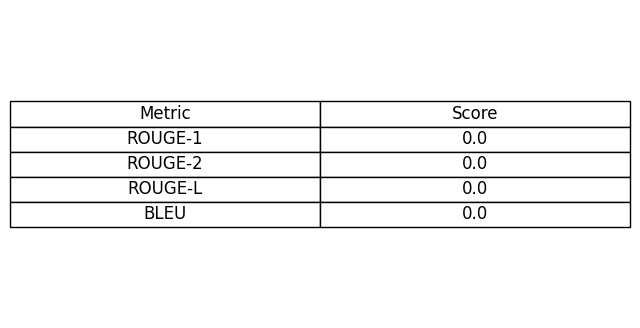

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# Reference summary and generated summary
reference_summary = "/content/drive/MyDrive/NLP/infosys (1).txt"


# Calculate ROUGE scores
rouge = Rouge()
rouge_scores = rouge.get_scores(summary, reference_summary)
rouge_1 = rouge_scores[0]["rouge-1"]["f"]
rouge_2 = rouge_scores[0]["rouge-2"]["f"]
rouge_l = rouge_scores[0]["rouge-l"]["f"]

# Calculate BLEU score
bleu_score = sentence_bleu([reference_summary.split()], summary.split())


# Create a DataFrame
data = {
    "Metric": ["ROUGE-1", "ROUGE-2", "ROUGE-L", "BLEU"],
    "Score": [rouge_1, rouge_2, rouge_l, bleu_score]
}
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.show()
